In [1]:
from nermodel import *

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [2]:
import pickle

In [3]:
import logging
logging.getLogger('tensorflow').setLevel(logging.ERROR)

In [4]:
import json

with open('./Task2_data/ATE_train.json', 'r') as file:
    train_data = json.load(file)
with open('./Task2_data/ATE_val.json', 'r') as file:
    val_data = json.load(file)
with open('./Task2_data/ATE_test.json', 'r') as file:
    test_data = json.load(file)

In [5]:
data_train = []
labels_train = []
for sample in train_data.items():
    data_train.append(sample[1]['text'].split())
    labels_train.append(sample[1]['labels'])

data_val = []
labels_val = []
for sample in val_data.items():
    data_val.append(sample[1]['text'].split())
    labels_val.append(sample[1]['labels'])

data_test = []
labels_test = []
for sample in test_data.items():
    data_test.append(sample[1]['text'].split())
    labels_test.append(sample[1]['labels'])

In [6]:
num_classes = len(list(set(list(chain(*labels_train)))))

Epoch 1/20
Cause: for/else statement not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
15/15 [==============================] - 14s 708ms/step - loss: 3.7987 - macro_f1: 0.4555 - accuracy: 0.7054 - val_loss: 3.5922 - val_macro_f1: 0.4826 - val_accuracy: 0.7559
Epoch 2/20
15/15 [==============================] - 10s 698ms/step - loss: 3.5749 - macro_f1: 0.5185 - accuracy: 0.7646 - val_loss: 3.5686 - val_macro_f1: 0.5187 - val_accuracy: 0.7695
Epoch 3/20
15/15 [==============================] - 10s 708ms/step - loss: 3.5592 - macro_f1: 0.5291 - accuracy: 0.7703 - val_loss: 3.5578 - val_macro_f1: 0.5291 - val_accuracy: 0.7713
Epoch 4/20
15/15 [==============================] - 11s 727ms/step - loss: 3.5512 - macro_f1: 0.5375 - accuracy: 0.7718 - val_loss: 3.5529 - val_macro_f1: 0.5363 - val_accuracy: 0.7722
Epoch 5/20
15/15 [==============================] - 10s 691ms/step - loss: 3.5478 - macro_f1: 0.5463 - accuracy: 0.7739 - 

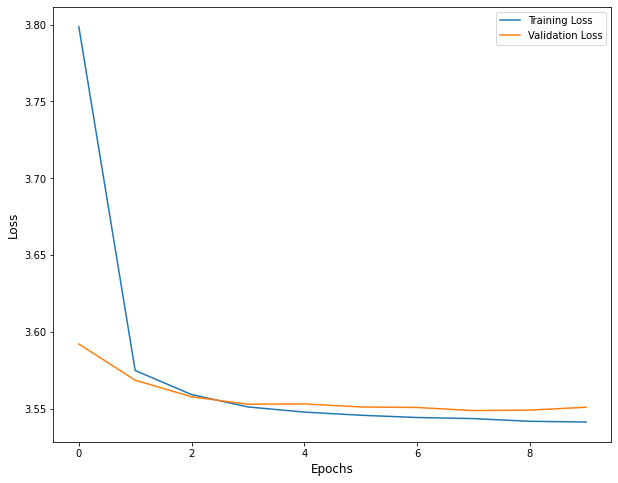

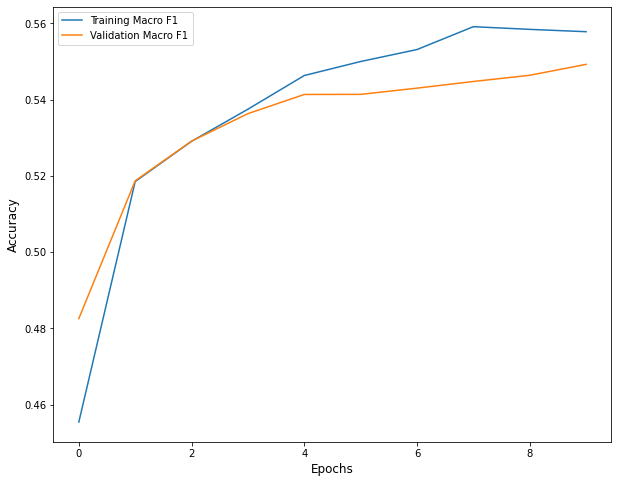

In [7]:
rnn_model_w2v = NERModel(num_classes=num_classes, num_features=300, layer=SimpleRNN)
rnn_model_w2v.fit(data_train, labels_train, data_val, labels_val, lr=0.001, epochs=20, batch_size=64)

Epoch 1/20
15/15 [==============================] - 11s 760ms/step - loss: 4.0109 - macro_f1: 0.4796 - accuracy: 0.7367 - val_loss: 3.6067 - val_macro_f1: 0.5101 - val_accuracy: 0.7519
Epoch 2/20
15/15 [==============================] - 11s 761ms/step - loss: 3.5747 - macro_f1: 0.5241 - accuracy: 0.7660 - val_loss: 3.5692 - val_macro_f1: 0.5222 - val_accuracy: 0.7691
Epoch 3/20
15/15 [==============================] - 14s 943ms/step - loss: 3.5592 - macro_f1: 0.5260 - accuracy: 0.7707 - val_loss: 3.5631 - val_macro_f1: 0.5209 - val_accuracy: 0.7708
Epoch 4/20
15/15 [==============================] - 12s 778ms/step - loss: 3.5540 - macro_f1: 0.5275 - accuracy: 0.7716 - val_loss: 3.5603 - val_macro_f1: 0.5214 - val_accuracy: 0.7712
Epoch 5/20
15/15 [==============================] - 12s 807ms/step - loss: 3.5518 - macro_f1: 0.5289 - accuracy: 0.7719 - val_loss: 3.5605 - val_macro_f1: 0.5214 - val_accuracy: 0.7712
Epoch 6/20
15/15 [==============================] - 11s 762ms/step - loss: 

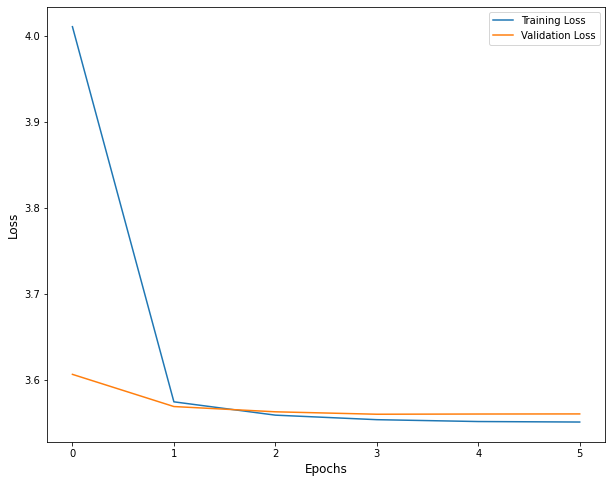

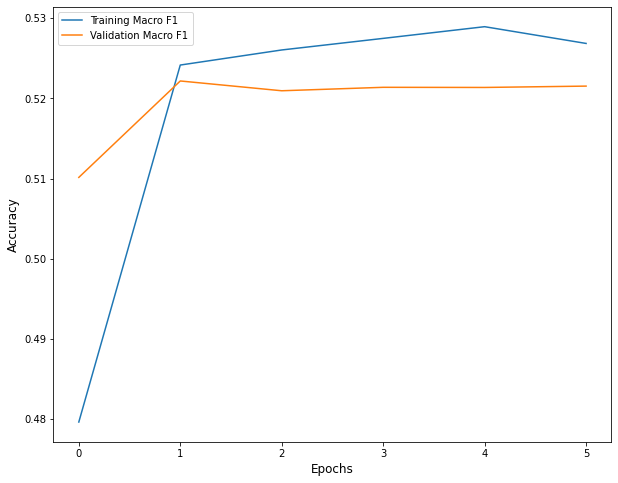

In [9]:
lstm_model_w2v = NERModel(num_classes=num_classes, num_features=300, layer=LSTM)
lstm_model_w2v.fit(data_train, labels_train, data_val, labels_val, lr=0.001, epochs=20, batch_size=64)

Epoch 1/20
15/15 [==============================] - 12s 820ms/step - loss: 4.1171 - macro_f1: 0.5200 - accuracy: 0.7560 - val_loss: 3.5743 - val_macro_f1: 0.5218 - val_accuracy: 0.7713
Epoch 2/20
15/15 [==============================] - 12s 787ms/step - loss: 3.5560 - macro_f1: 0.5344 - accuracy: 0.7720 - val_loss: 3.5765 - val_macro_f1: 0.5167 - val_accuracy: 0.7631
Epoch 3/20
15/15 [==============================] - 12s 843ms/step - loss: 3.5525 - macro_f1: 0.5413 - accuracy: 0.7717 - val_loss: 3.5713 - val_macro_f1: 0.5357 - val_accuracy: 0.7721
Epoch 4/20
15/15 [==============================] - 12s 836ms/step - loss: 3.5500 - macro_f1: 0.5516 - accuracy: 0.7730 - val_loss: 3.5738 - val_macro_f1: 0.5362 - val_accuracy: 0.7716
Epoch 5/20
15/15 [==============================] - 11s 771ms/step - loss: 3.5487 - macro_f1: 0.5520 - accuracy: 0.7738 - val_loss: 3.5776 - val_macro_f1: 0.5582 - val_accuracy: 0.7724


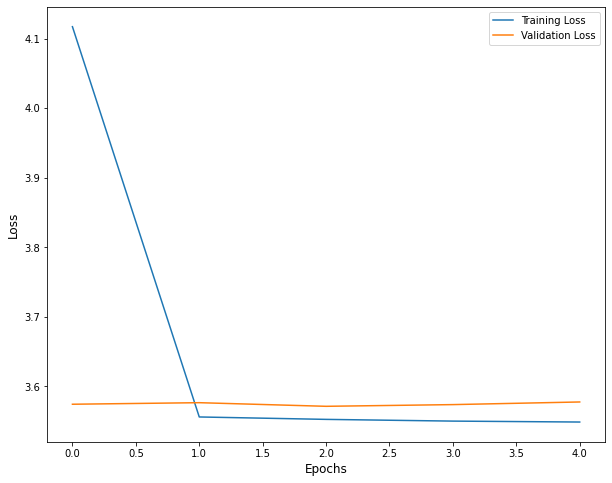

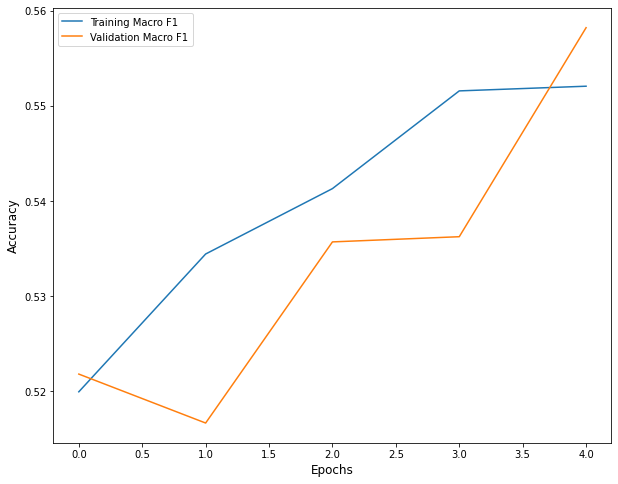

In [11]:
gru_model_w2v = NERModel(num_classes=num_classes, num_features=300, layer=GRU)
gru_model_w2v.fit(data_train, labels_train, data_val, labels_val, lr=0.001, epochs=20, batch_size=64)

Epoch 1/20
15/15 [==============================] - 10s 697ms/step - loss: 3.7989 - macro_f1: 0.4729 - accuracy: 0.7342 - val_loss: 3.5866 - val_macro_f1: 0.5029 - val_accuracy: 0.7609
Epoch 2/20
15/15 [==============================] - 10s 704ms/step - loss: 3.5738 - macro_f1: 0.5208 - accuracy: 0.7672 - val_loss: 3.5601 - val_macro_f1: 0.5206 - val_accuracy: 0.7706
Epoch 3/20
15/15 [==============================] - 11s 753ms/step - loss: 3.5567 - macro_f1: 0.5288 - accuracy: 0.7712 - val_loss: 3.5507 - val_macro_f1: 0.5241 - val_accuracy: 0.7726
Epoch 4/20
15/15 [==============================] - 11s 715ms/step - loss: 3.5513 - macro_f1: 0.5276 - accuracy: 0.7722 - val_loss: 3.5484 - val_macro_f1: 0.5246 - val_accuracy: 0.7726
Epoch 5/20
15/15 [==============================] - 10s 674ms/step - loss: 3.5496 - macro_f1: 0.5284 - accuracy: 0.7723 - val_loss: 3.5474 - val_macro_f1: 0.5370 - val_accuracy: 0.7733
Epoch 6/20
15/15 [==============================] - 10s 692ms/step - loss: 

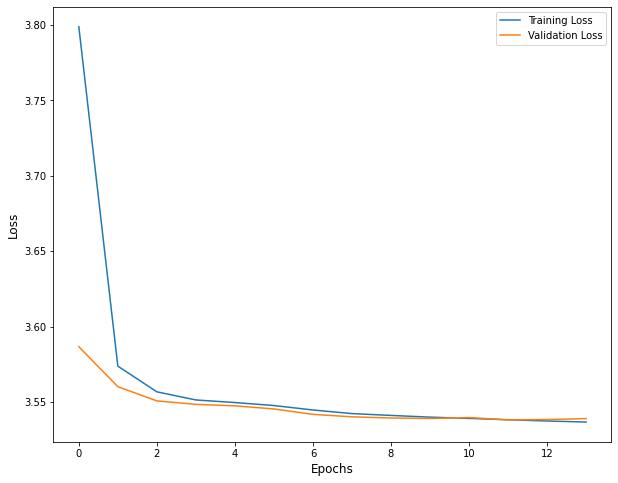

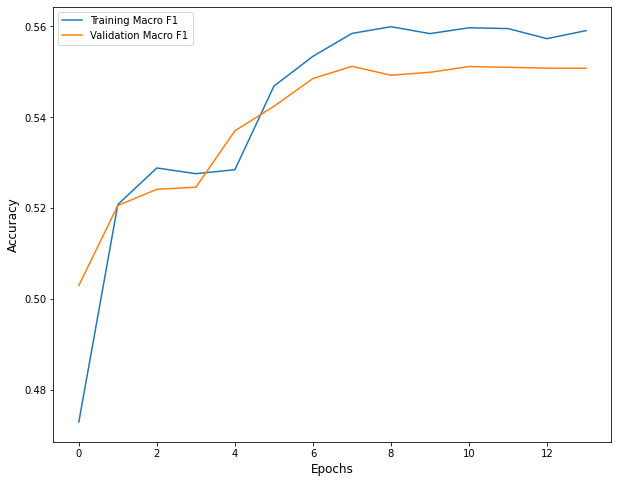

In [13]:
rnn_model_glove = NERModel(num_classes=num_classes, num_features=300, layer=SimpleRNN, embed='glove')
rnn_model_glove.fit(data_train, labels_train, data_val, labels_val, lr=0.001, epochs=20, batch_size=64)

Epoch 1/20
15/15 [==============================] - 10s 670ms/step - loss: 3.9719 - macro_f1: 0.4921 - accuracy: 0.7549 - val_loss: 3.5914 - val_macro_f1: 0.5093 - val_accuracy: 0.7511
Epoch 2/20
15/15 [==============================] - 9s 578ms/step - loss: 3.5708 - macro_f1: 0.5204 - accuracy: 0.7660 - val_loss: 3.5586 - val_macro_f1: 0.5214 - val_accuracy: 0.7703
Epoch 3/20
15/15 [==============================] - 9s 618ms/step - loss: 3.5574 - macro_f1: 0.5249 - accuracy: 0.7708 - val_loss: 3.5516 - val_macro_f1: 0.5236 - val_accuracy: 0.7723
Epoch 4/20
15/15 [==============================] - 9s 597ms/step - loss: 3.5521 - macro_f1: 0.5273 - accuracy: 0.7721 - val_loss: 3.5488 - val_macro_f1: 0.5239 - val_accuracy: 0.7726
Epoch 5/20
15/15 [==============================] - 9s 614ms/step - loss: 3.5504 - macro_f1: 0.5302 - accuracy: 0.7722 - val_loss: 3.5479 - val_macro_f1: 0.5247 - val_accuracy: 0.7727
Epoch 6/20
15/15 [==============================] - 9s 613ms/step - loss: 3.549

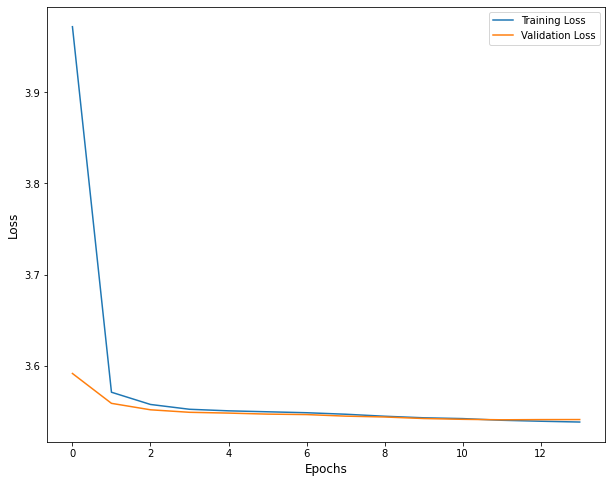

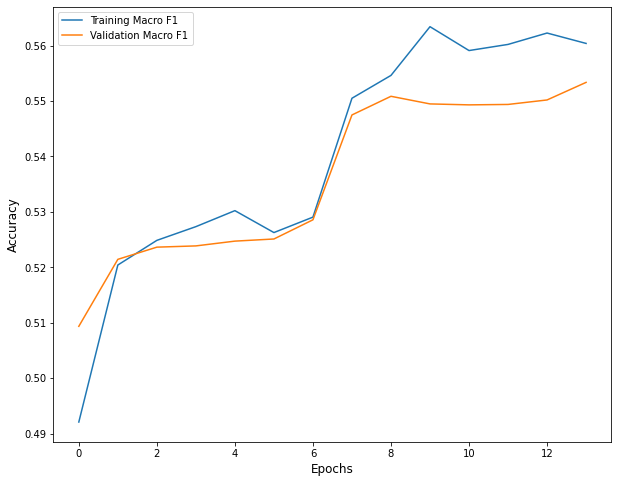

In [15]:
lstm_model_glove = NERModel(num_classes=num_classes, num_features=300, layer=LSTM, embed='glove')
lstm_model_glove.fit(data_train, labels_train, data_val, labels_val, lr=0.001, epochs=20, batch_size=64)

Epoch 1/20
15/15 [==============================] - 9s 584ms/step - loss: 4.0581 - macro_f1: 0.5166 - accuracy: 0.7555 - val_loss: 3.5584 - val_macro_f1: 0.5230 - val_accuracy: 0.7713
Epoch 2/20
15/15 [==============================] - 9s 588ms/step - loss: 3.5527 - macro_f1: 0.5316 - accuracy: 0.7716 - val_loss: 3.5472 - val_macro_f1: 0.5450 - val_accuracy: 0.7736
Epoch 3/20
15/15 [==============================] - 9s 591ms/step - loss: 3.5493 - macro_f1: 0.5519 - accuracy: 0.7732 - val_loss: 3.5473 - val_macro_f1: 0.5407 - val_accuracy: 0.7736
Epoch 4/20
15/15 [==============================] - 9s 583ms/step - loss: 3.5474 - macro_f1: 0.5598 - accuracy: 0.7743 - val_loss: 3.5473 - val_macro_f1: 0.5509 - val_accuracy: 0.7741


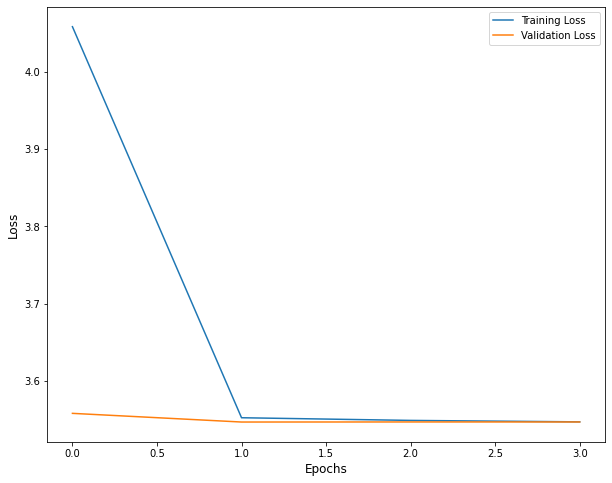

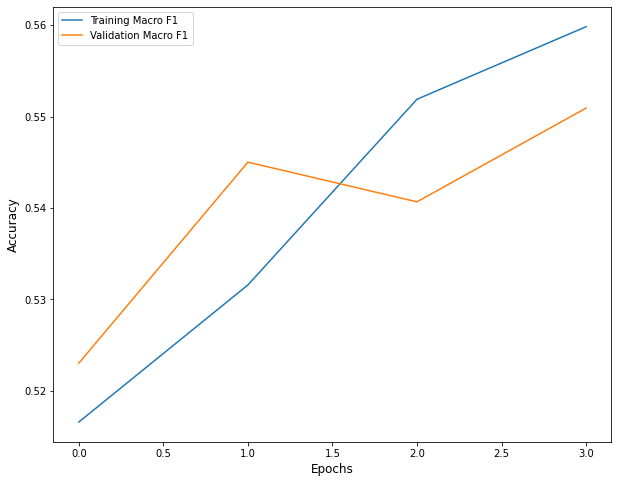

In [17]:
gru_model_glove = NERModel(num_classes=num_classes, num_features=300, layer=GRU, embed='glove')
gru_model_glove.fit(data_train, labels_train, data_val, labels_val, lr=0.001, epochs=20, batch_size=64)

Epoch 1/20
15/15 [==============================] - 8s 528ms/step - loss: 3.7831 - macro_f1: 0.4745 - accuracy: 0.7349 - val_loss: 3.6331 - val_macro_f1: 0.4826 - val_accuracy: 0.7559
Epoch 2/20
15/15 [==============================] - 8s 528ms/step - loss: 3.6101 - macro_f1: 0.4800 - accuracy: 0.7544 - val_loss: 3.5875 - val_macro_f1: 0.4826 - val_accuracy: 0.7559
Epoch 3/20
15/15 [==============================] - 8s 527ms/step - loss: 3.5802 - macro_f1: 0.4918 - accuracy: 0.7555 - val_loss: 3.5688 - val_macro_f1: 0.5058 - val_accuracy: 0.7619
Epoch 4/20
15/15 [==============================] - 8s 526ms/step - loss: 3.5656 - macro_f1: 0.5216 - accuracy: 0.7677 - val_loss: 3.5569 - val_macro_f1: 0.5218 - val_accuracy: 0.7713
Epoch 5/20
15/15 [==============================] - 8s 515ms/step - loss: 3.5568 - macro_f1: 0.5264 - accuracy: 0.7714 - val_loss: 3.5512 - val_macro_f1: 0.5240 - val_accuracy: 0.7724
Epoch 6/20
15/15 [==============================] - 8s 525ms/step - loss: 3.5525

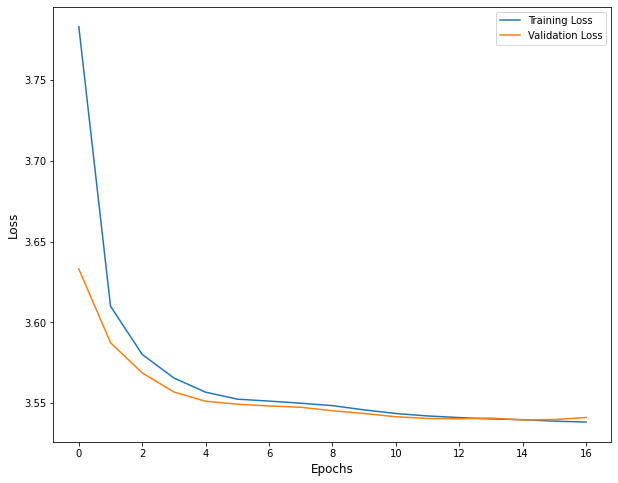

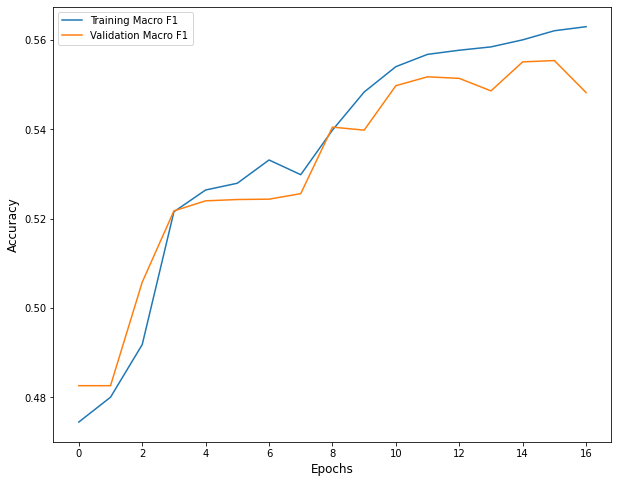

In [19]:
rnn_model_ft = NERModel(num_classes=num_classes, num_features=300, layer=SimpleRNN, embed='fasttext')
rnn_model_ft.fit(data_train, labels_train, data_val, labels_val, lr=0.001, epochs=20, batch_size=64)

Epoch 1/20
15/15 [==============================] - 9s 590ms/step - loss: 4.1000 - macro_f1: 0.4499 - accuracy: 0.7018 - val_loss: 3.6994 - val_macro_f1: 0.4826 - val_accuracy: 0.7559
Epoch 2/20
15/15 [==============================] - 9s 577ms/step - loss: 3.6123 - macro_f1: 0.4998 - accuracy: 0.7584 - val_loss: 3.5695 - val_macro_f1: 0.5155 - val_accuracy: 0.7672
Epoch 3/20
15/15 [==============================] - 8s 573ms/step - loss: 3.5632 - macro_f1: 0.5245 - accuracy: 0.7682 - val_loss: 3.5539 - val_macro_f1: 0.5221 - val_accuracy: 0.7714
Epoch 4/20
15/15 [==============================] - 9s 608ms/step - loss: 3.5540 - macro_f1: 0.5279 - accuracy: 0.7711 - val_loss: 3.5501 - val_macro_f1: 0.5233 - val_accuracy: 0.7721
Epoch 5/20
15/15 [==============================] - 9s 587ms/step - loss: 3.5516 - macro_f1: 0.5272 - accuracy: 0.7719 - val_loss: 3.5500 - val_macro_f1: 0.5233 - val_accuracy: 0.7722
Epoch 6/20
15/15 [==============================] - 9s 587ms/step - loss: 3.5506

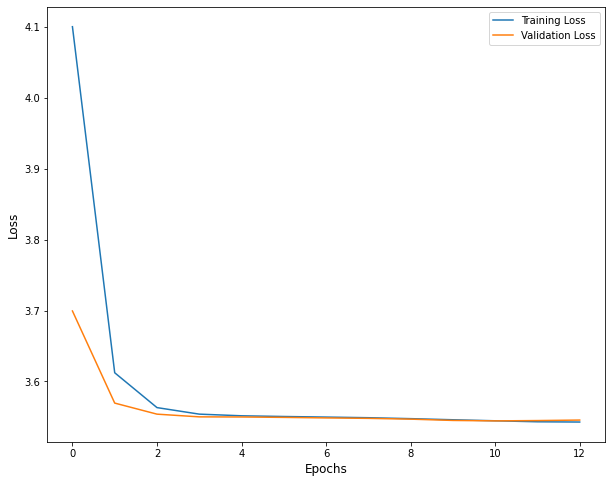

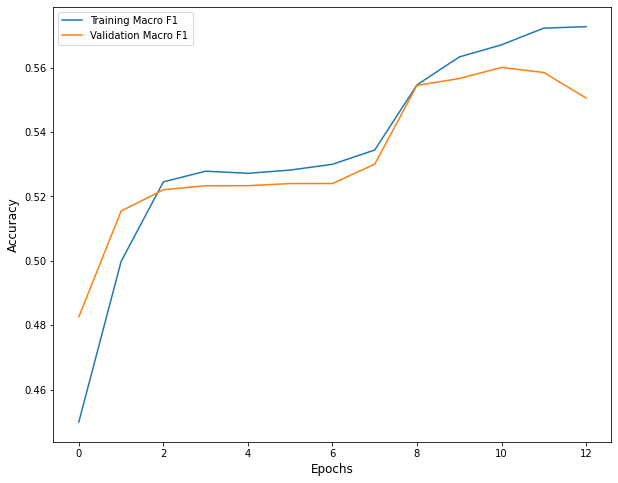

In [21]:
lstm_model_ft = NERModel(num_classes=num_classes, num_features=300, layer=LSTM, embed='fasttext')
lstm_model_ft.fit(data_train, labels_train, data_val, labels_val, lr=0.001, epochs=20, batch_size=64)

Epoch 1/20
15/15 [==============================] - 9s 597ms/step - loss: 4.1471 - macro_f1: 0.4954 - accuracy: 0.7398 - val_loss: 3.5971 - val_macro_f1: 0.5103 - val_accuracy: 0.7640
Epoch 2/20
15/15 [==============================] - 9s 582ms/step - loss: 3.5606 - macro_f1: 0.5341 - accuracy: 0.7699 - val_loss: 3.5498 - val_macro_f1: 0.5240 - val_accuracy: 0.7722
Epoch 3/20
15/15 [==============================] - 9s 577ms/step - loss: 3.5509 - macro_f1: 0.5373 - accuracy: 0.7722 - val_loss: 3.5482 - val_macro_f1: 0.5348 - val_accuracy: 0.7732
Epoch 4/20
15/15 [==============================] - 9s 582ms/step - loss: 3.5486 - macro_f1: 0.5455 - accuracy: 0.7731 - val_loss: 3.5465 - val_macro_f1: 0.5430 - val_accuracy: 0.7738
Epoch 5/20
15/15 [==============================] - 9s 579ms/step - loss: 3.5470 - macro_f1: 0.5589 - accuracy: 0.7741 - val_loss: 3.5463 - val_macro_f1: 0.5469 - val_accuracy: 0.7740
Epoch 6/20
15/15 [==============================] - 9s 578ms/step - loss: 3.5455

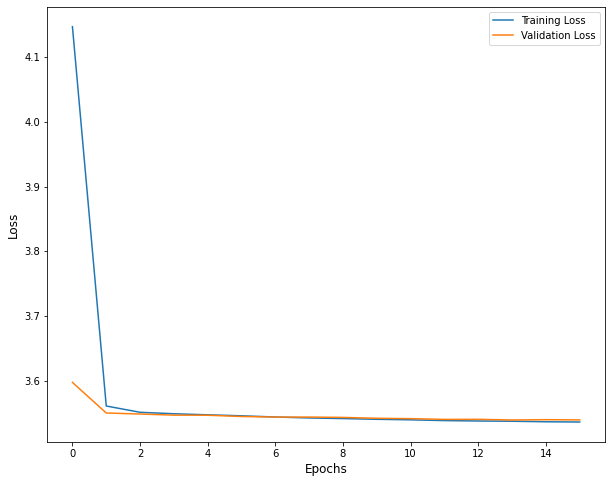

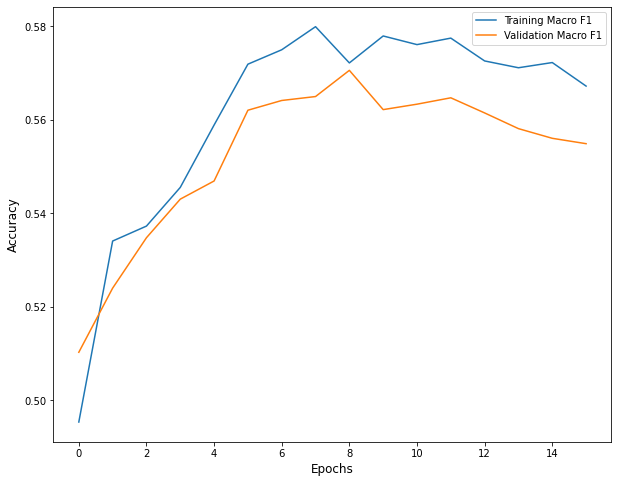

In [23]:
gru_model_ft = NERModel(num_classes=num_classes, num_features=300, layer=GRU, embed='fasttext')
gru_model_ft.fit(data_train, labels_train, data_val, labels_val, lr=0.001, epochs=20, batch_size=64)